<a href="https://colab.research.google.com/github/AliaaElshamekh/Multi-class-classifier-that-successfully-classifies-the-images-of-the-Fashion-MNIST-dataset./blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import warnings
import math 
from sklearn.metrics import mean_squared_error 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import svm
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import Data

In [ ]:
X_traindf = pd.read_csv('X_train.csv')
X_testdf = pd.read_csv('X_test.csv')
y_traindf = pd.read_csv('y_train.csv')
y_testdf = pd.read_csv('y_test.csv')
X_traindf.head()

,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,41,188,103,54,48,43,87,168,133,16,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,1.1,0.20,0.21,0.22,49,136,219,216,228,...,244.2,240,243.1,214.8,224.4,162,0.279,2.6,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,1.13,0.289,0.290,139.1,146,130,135,135.1,137,125,124.1,125.1,121.1,119,114,130.1,76.1,0.291,0.292,0.293,0.294,0.295,0.296
0,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,11,142,200,106,0,0,0,0,0,0,0,85,185,112,0,0,0,0,0,0,0,0,0,0,0,0,0,152,214,217,194,236,216,...,206,255,197,178,179,42,0,5,0,0,0,0,0,0,0,0,0,3,0,115,135,113,106,85,82,108,133,83,90,121,120,110,158,18,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,19,4,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,72,157,222,...,239,228,231,198,217,17,0,2,0,0,0,0,0,0,0,0,0,1,0,0,37,69,89,97,109,122,127,126,130,116,91,80,46,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,58,121,218,110,58,42,54,85,176,228,121,33,0,0,0,0,0,0,0,0,0,0,0,0,0,18,66,129,148,121,149,254,...,235,233,233,228,190,202,0,0,3,0,0,0,0,0,0,1,0,0,44,19,29,27,26,29,29,28,27,27,27,25,21,23,30,37,0,0,1,0,0,0


In [ ]:
#Let's create numpy arrays for X and y
X_train = X_traindf.values
X_test = X_testdf.values
y_train = y_traindf.values
y_test = y_testdf.values

In [ ]:
y_traindf.hist(column='0')
y_testdf.hist(column='0')

In [ ]:
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(9999)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat"]

Label   Description\
0         T-shirt/top \
1         Trouser\
2         Pullover\
3         Dress\
4         Coat


In [ ]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()   

In [ ]:
showImage(X_train[10])

In [ ]:
y_train[100]

In [ ]:
y_train[0]

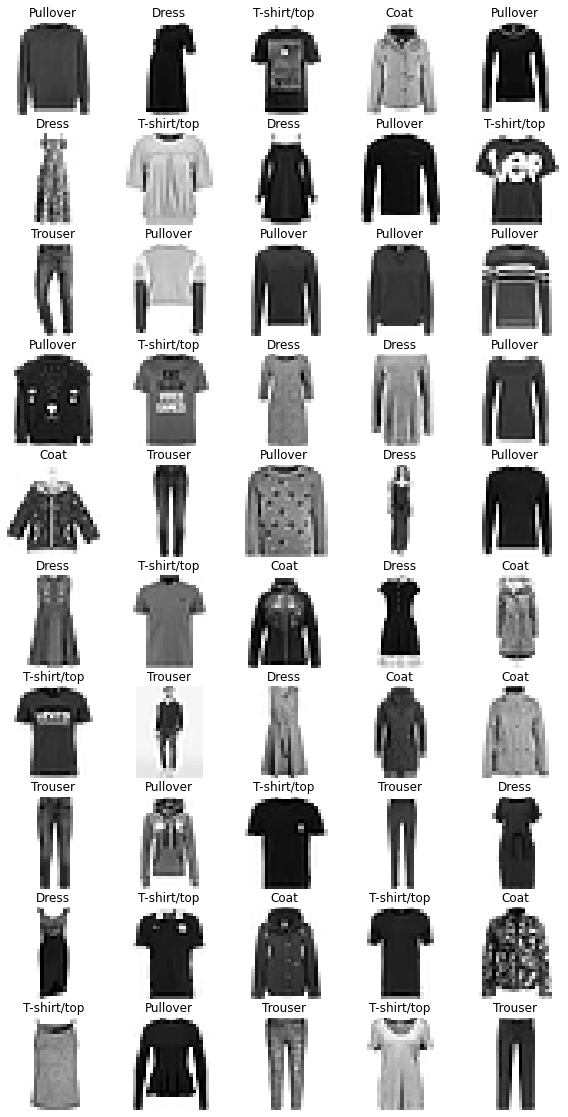

In [ ]:
plt.figure(figsize = (10,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28,28), cmap="gray_r")
    #showImage(X_train[i])
    plt.title(labels[y_train[i][0]])

In [ ]:
# reshape(examples, height, width, channels)
#X_train=X_train.reshape((-1, 28, 28, 1))
#X_test=X_test.reshape((-1, 28, 28, 1))

In [ ]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
#df_test = df_test.astype("float32")/255

# Kernal SVM

## No Scaling

In [ ]:
clf = svm.SVC(kernel='rbf', random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=4)
scores

array([0.8976   , 0.8972   , 0.892    , 0.8907563])

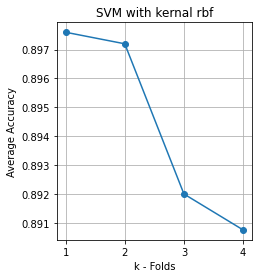

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with kernal rbf and C = 1")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores,'o-');

In [ ]:
clf_c10 = svm.SVC(kernel='rbf',C=10, random_state=42)
scores = cross_val_score(clf_c10, X_train, y_train, cv=4)
scores

array([0.9104    , 0.9148    , 0.9024    , 0.89835934])

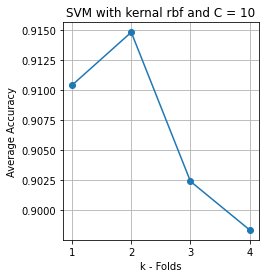

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with kernal rbf and C = 10")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores,'o-');

In [ ]:
#no scaling and using 4-fold cross validation
#SVC
#svc = SVC()
scores_no_c10 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    clf_c10.fit(X_train_fold, y_train_fold)
    scores_no_c10.append(clf_c10.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", clf_c10.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", clf_c10.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9851980264035205
  - Testing score =  0.9068
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9835978130417389
  - Testing score =  0.916
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9841312174956661
  - Testing score =  0.9044
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9832
  - Testing score =  0.898359343737495


In [ ]:
clf_c10.score(X_test, y_test)


0.8943788757751551

In [ ]:
#no scaling and using 4-fold cross validation
#SVC
svc = SVC()
scores = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    svc.fit(X_train_fold, y_train_fold)
    scores.append(svc.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", svc.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", svc.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9194559274569942
  - Testing score =  0.8964
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9201226830244033
  - Testing score =  0.8956
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9221229497266302
  - Testing score =  0.896
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9218666666666666
  - Testing score =  0.8919567827130852


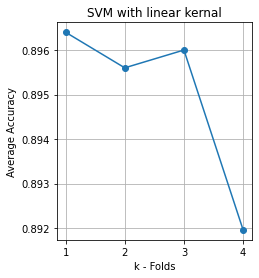

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with linear kernal")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores,'o-');

In [ ]:
clf = svm.SVC(kernel='sigmoid', C=10, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=4)
scores

array([0.4228    , 0.428     , 0.4224    , 0.44577831])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.01


In [ ]:
clf = svm.SVC(kernel='sigmoid', C=1000, random_state=42)
scores_C1000 = cross_val_score(clf, X_train, y_train, cv=4)
scores_C1000

array([0.4208    , 0.4272    , 0.422     , 0.44537815])

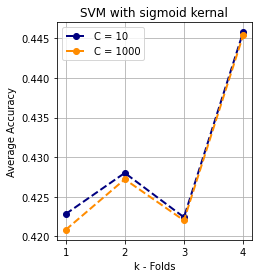

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with sigmoid kernal")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
lw = 2
plt.plot(np.arange(1, 5, 1),scores,'o-',label="C = 10",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_C1000,'o-',label="C = 1000",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
# Separate data into test and training sets
svclassifier = getClassifier(0) 
#svclassifier.fit(X_train, y_train)# Make prediction
scores_poly = cross_val_score(svclassifier, X_train, y_train, cv=4)
scores_poly

array([0.8096    , 0.82      , 0.8068    , 0.78031212])

In [ ]:
svclassifier_poly2 = SVC(kernel='poly', degree=8,C=100)
scores_poly2 = cross_val_score(svclassifier_poly2, X_train, y_train, cv=4)
scores_poly2

array([0.8252    , 0.8332    , 0.8404    , 0.82032813])

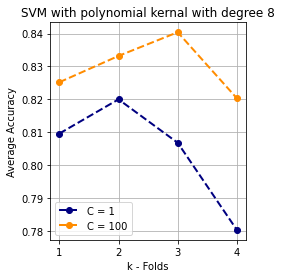

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with polynomial kernal with degree 8")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
lw = 2
plt.plot(np.arange(1, 5, 1),scores_poly,'o-',label="C = 1",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_poly2,'o-',label="C = 100",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="scale")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', C=10, random_state=42)
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="scale", random_state=42)

In [ ]:
for i in range(3):
    # Separate data into test and training sets
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       999
           1       0.94      0.96      0.95      1000
           2       0.74      0.78      0.76      1000
           3       0.84      0.81      0.83      1000
           4       0.77      0.74      0.75      1000

    accuracy                           0.83      4999
   macro avg       0.83      0.83      0.83      4999
weighted avg       0.83      0.83      0.83      4999

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       999
           1       0.20      1.00      0.33      1000
           2       0.00      0.00      0.00      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000

    accuracy                           0.20      4999
   macro avg       0.64      0.20      0.07      4999
weighted avg       0.64 

In [ ]:
for i in range(3):
    # Separate data into test and training sets
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    #y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print("Accuracy on training set: {:.2f}".format(svclassifier.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(svclassifier.score(X_test, y_test)))
    #print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
Accuracy on training set: 1.00
Accuracy on test set: 0.83
Evaluation: RBF kernel
Accuracy on training set: 1.00
Accuracy on test set: 0.20
Evaluation: Sigmoid kernel
Accuracy on training set: 0.20
Accuracy on test set: 0.20


## Standard Scaling

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', random_state=42))])
scores = cross_val_score(pipe, X_train, y_train, cv=4)
scores

array([0.8884    , 0.8956    , 0.8896    , 0.89555822])

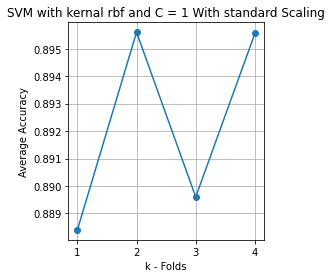

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with kernal rbf and C = 1 With standard Scaling")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores,'o-');

In [ ]:
#no scaling and using 4-fold cross validation
#SVC
#svc = SVC()
pipe_c10 = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf',C=10 ,random_state=42))])
scores_p_C10 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_c10.fit(X_train_fold, y_train_fold)
    scores_p_C10.append(pipe_c10.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_c10.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_c10.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9939991998933191
  - Testing score =  0.9016
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9930657420989465
  - Testing score =  0.908
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9933324443259102
  - Testing score =  0.9028
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9916
  - Testing score =  0.8995598239295718


In [ ]:
pipe_c10.score(X_test, y_test)

0.8923784756951391

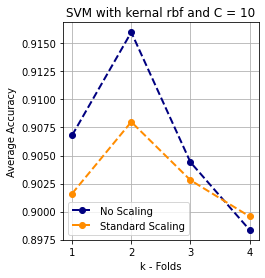

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with kernal rbf and C = 10")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores_no_c10,'o-',label="No Scaling",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_p_C10,'o-',label="Standard Scaling",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()


In [ ]:
pipe_linear_c100 = Pipeline([('scaler', StandardScaler()),('svc', SVC(C=100 ,random_state=42))])
scores_linear_C100 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_linear_c100.fit(X_train_fold, y_train_fold)
    scores_linear_C100.append(pipe_c10.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_linear_c100.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_linear_c100.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.8984
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.8984
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.8984
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  1.0
  - Testing score =  0.8931572629051621


In [ ]:
pipe_linear_c100.score(X_test, y_test)

0.8841768353670734

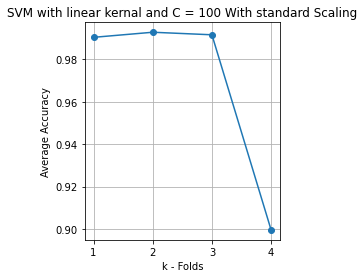

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("SVM with linear kernal and C = 100 With standard Scaling")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores_linear_C100,'o-');

## Min Max Scaling

In [ ]:

pipe_l200_min = Pipeline([('scaler', MinMaxScaler()),('svc', SVC(kernel='linear',probability = True,C=100 ,random_state=42))])
scores_lmin200 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_l200_min.fit(X_train_fold, y_train_fold)
    scores_lmin200.append(pipe_l200_min.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_l200_min.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_l200_min.score(X_test_fold, y_test_fold))    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9838645152687024
  - Testing score =  0.8372
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9806640885451393
  - Testing score =  0.8436
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9827977063608481
  - Testing score =  0.8396
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9877333333333334
  - Testing score =  0.8267306922769108


In [ ]:
pipe_l200_min.score(X_test, y_test)

0.8237647529505902

In [ ]:

# Make predictions on entire test data
predictions = pipe_l200_min.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, ..., 2, 4, 4])

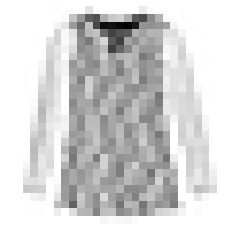

In [ ]:
showImage(X_test[3891])

In [ ]:
y_test[3891]

array([3])

In [ ]:
pipe_l200_min.predict_proba(X_test[3891].reshape(1, -1))

array([[0.35603955, 0.01826685, 0.09845151, 0.10911877, 0.41812331]])

In [ ]:
pipe_l200_min.predict(X_test[3891].reshape(1, -1))

array([4])

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label[0] != predict: 
       misclassifiedIndexes.append(index)
    index +=1

In [ ]:
misclassifiedIndexes

[8,
 14,
 29,
 33,
 36,
 37,
 46,
 59,
 81,
 86,
 105,
 107,
 113,
 123,
 124,
 128,
 134,
 150,
 152,
 159,
 176,
 189,
 232,
 250,
 264,
 271,
 286,
 289,
 290,
 300,
 310,
 312,
 318,
 321,
 322,
 339,
 346,
 349,
 350,
 355,
 356,
 366,
 383,
 393,
 401,
 409,
 415,
 420,
 424,
 425,
 461,
 473,
 478,
 511,
 524,
 540,
 542,
 543,
 544,
 579,
 590,
 597,
 598,
 602,
 610,
 614,
 618,
 620,
 626,
 634,
 654,
 695,
 711,
 726,
 730,
 763,
 774,
 783,
 789,
 794,
 807,
 817,
 818,
 827,
 830,
 837,
 845,
 852,
 853,
 861,
 862,
 863,
 875,
 884,
 886,
 902,
 906,
 916,
 920,
 926,
 930,
 934,
 948,
 964,
 967,
 970,
 971,
 979,
 985,
 990,
 1024,
 1069,
 1079,
 1111,
 1114,
 1131,
 1146,
 1164,
 1172,
 1196,
 1239,
 1249,
 1384,
 1392,
 1457,
 1479,
 1507,
 1522,
 1532,
 1547,
 1590,
 1613,
 1648,
 1735,
 1760,
 1763,
 1780,
 1786,
 1858,
 1860,
 1899,
 1903,
 1913,
 1930,
 1934,
 1943,
 1959,
 1987,
 1999,
 2007,
 2022,
 2029,
 2030,
 2033,
 2034,
 2035,
 2036,
 2046,
 2048,
 2049,
 

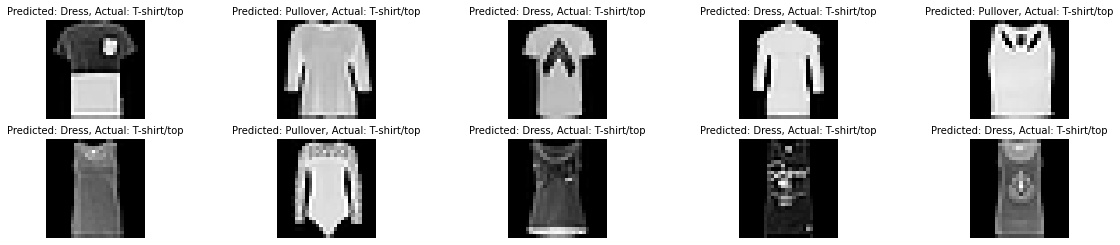

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions[badIndex]))], labels[y_test[badIndex][0]]), fontsize = 10)

In [ ]:
pipe_rmin_c200 = Pipeline([('scaler', MinMaxScaler()),('svc', SVC(kernel='rbf',probability = True,C=100 ,random_state=42))])
scores_rmin_C200 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_rmin_c200.fit(X_train_fold, y_train_fold)
    scores_rmin_C200.append(pipe_rmin_c200.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_rmin_c200.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_rmin_c200.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.902
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.9048
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.906
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  1.0
  - Testing score =  0.8959583833533413


In [ ]:
pipe_rmin_c200.score(X_test, y_test)

0.8837767553510703

In [ ]:

# Make predictions on entire test data
predictions_rbf = pipe_rmin_c200.predict(X_test)

In [ ]:
index = 0
misclassifiedIndexes_rbf = []
for label, predict in zip(y_test, predictions_rbf):
    if label[0] != predict: 
       misclassifiedIndexes_rbf.append(index)
    index +=1

In [ ]:
index = 0
corr_classifiedIndexes_rbf = []
for label, predict in zip(y_test, predictions_rbf):
    if label[0] == predict: 
       corr_classifiedIndexes_rbf.append(index)
    index +=1

In [ ]:
misclassifiedIndexes_rbf

[46,
 53,
 59,
 104,
 107,
 113,
 123,
 124,
 152,
 159,
 176,
 189,
 191,
 213,
 225,
 232,
 263,
 271,
 289,
 300,
 302,
 312,
 317,
 318,
 321,
 338,
 346,
 349,
 351,
 356,
 366,
 393,
 399,
 401,
 409,
 420,
 424,
 425,
 429,
 461,
 469,
 473,
 524,
 537,
 543,
 544,
 576,
 602,
 610,
 618,
 620,
 626,
 634,
 655,
 695,
 711,
 724,
 729,
 730,
 764,
 767,
 774,
 781,
 783,
 789,
 794,
 806,
 807,
 817,
 818,
 837,
 852,
 853,
 861,
 875,
 884,
 906,
 916,
 920,
 922,
 948,
 958,
 967,
 970,
 971,
 979,
 985,
 998,
 1024,
 1043,
 1068,
 1069,
 1079,
 1111,
 1146,
 1164,
 1239,
 1249,
 1302,
 1350,
 1392,
 1457,
 1479,
 1507,
 1522,
 1532,
 1539,
 1547,
 1550,
 1590,
 1613,
 1648,
 1760,
 1786,
 1858,
 1899,
 1903,
 1913,
 1930,
 1934,
 1943,
 1959,
 1987,
 2019,
 2022,
 2029,
 2035,
 2049,
 2054,
 2059,
 2080,
 2084,
 2087,
 2089,
 2090,
 2091,
 2099,
 2102,
 2107,
 2119,
 2124,
 2126,
 2136,
 2141,
 2143,
 2154,
 2156,
 2158,
 2164,
 2165,
 2166,
 2168,
 2181,
 2188,
 2208,
 2213,

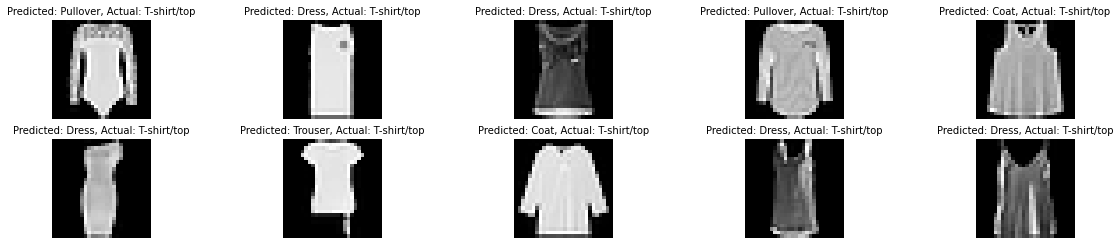

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes_rbf[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions_rbf[badIndex]))], labels[y_test[badIndex][0]]), fontsize = 10)

In [ ]:
corr_classifiedIndexes_rbf 


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 192,
 193,
 194,
 195,
 196,
 19

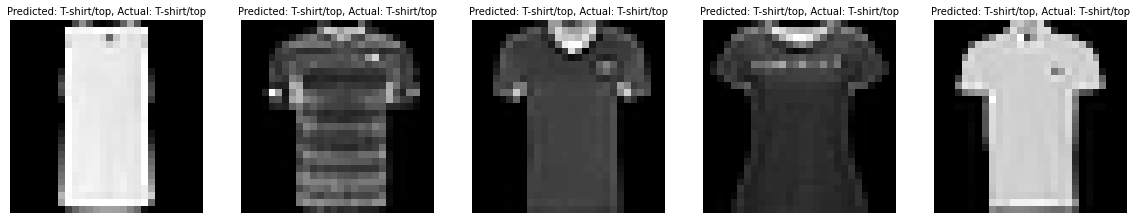

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(corr_classifiedIndexes_rbf[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[goodIndex], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions_rbf[goodIndex]))], labels[y_test[goodIndex][0]]), fontsize = 10)

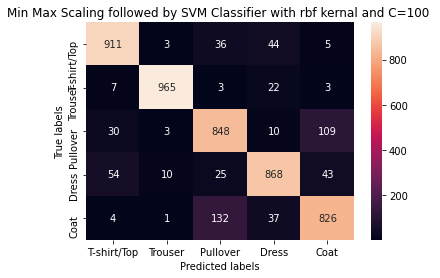

In [ ]:
rbf_cm = metrics.confusion_matrix(y_test, predictions_rbf)
ax= plt.subplot()
sns.heatmap(rbf_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title( 'Min Max Scaling followed by SVM Classifier with rbf kernal and C=100 ' ); 
#ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat'])); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

In [ ]:
labels

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat']

In [ ]:
rbf_cm

array([[911,   3,  36,  44,   5],
       [  7, 965,   3,  22,   3],
       [ 30,   3, 848,  10, 109],
       [ 54,  10,  25, 868,  43],
       [  4,   1, 132,  37, 826]])

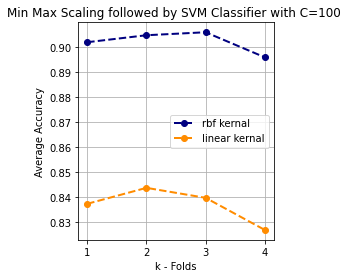

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Min Max Scaling followed by SVM Classifier with C=100 ")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores_rmin_C200,'o-',label="rbf kernal ",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_lmin200,'o-',label="linear kernal",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()


## Robust Scaling

In [ ]:
#no scaling and using 4-fold cross validation
#SVC
#svc = SVC()
pipe_c200 = Pipeline([('scaler', RobustScaler()),('svc', SVC(kernel='rbf',C=200 ,random_state=42))])
scores_p_C200 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_c200.fit(X_train_fold, y_train_fold)
    scores_p_C200.append(pipe_c200.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_c200.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_c200.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9361248166422189
  - Testing score =  0.852
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9366582210961462
  - Testing score =  0.8588
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9353247099613282
  - Testing score =  0.8584
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9373333333333334
  - Testing score =  0.8651460584233693


In [ ]:
pipe_c200.score(X_test, y_test)

0.8469693938787758

In [ ]:
#no scaling and using 4-fold cross validation
#SVC
#svc = SVC()
pipe_linear_c200 = Pipeline([('scaler', RobustScaler()),('svc', SVC(C=200 ,random_state=42))])
scores_linear_C200 = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_linear_c200.fit(X_train_fold, y_train_fold)
    scores_linear_C200.append(pipe_c200.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_linear_c200.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_linear_c200.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9361248166422189
  - Testing score =  0.852
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9366582210961462
  - Testing score =  0.8588
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9353247099613282
  - Testing score =  0.8584
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9373333333333334
  - Testing score =  0.8651460584233693


In [ ]:
pipe_linear_c200.score(X_test, y_test)

0.8469693938787758

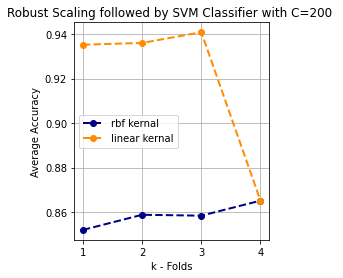

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("Robust Scaling followed by SVM Classifier with C=200 ")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores_p_C200,'o-',label="rbf kernal",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_linear_C200,'o-',label="linear kernal",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()


## Parameters Tuning

### Linear Kernal tuning

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 25]}]

svc_grid = SVC(random_state=42)
svm_search = GridSearchCV(
    estimator=svc_grid, param_grid=tuned_parameters,
    scoring='accuracy', cv=4,refit=True,verbose=2)

In [ ]:
X_train.shape

(9999, 784)

In [ ]:
svm_search.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1, kernel=linear, total= 2.5min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total= 2.5min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 2.5min
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total= 2.5min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.4min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.4min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.4min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.4min
[CV] C=25, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 19.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 25], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [ ]:
print(svm_search.best_estimator_)

SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
results_df = pd.DataFrame(svm_search.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
25_linear,"{'C': 25, 'kernel': 'linear'}",1,0.821782,0.004850
10_linear,"{'C': 10, 'kernel': 'linear'}",2,0.795079,0.004912
1_linear,"{'C': 1, 'kernel': 'linear'}",3,0.652971,0.032335


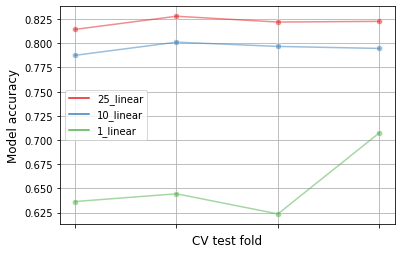

Correlation of models:
 kernel     25_linear  10_linear  1_linear
kernel                                   
25_linear   1.000000   0.979147  0.182129
10_linear   0.979147   1.000000  0.001950
1_linear    0.182129   0.001950  1.000000


In [ ]:
# create df of model scores ordered by perfomance
model_scores = results_df.filter(regex=r'split\d*_test_score')

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model accuracy", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.grid()
plt.legend(loc="best")
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [ ]:
print("Best parameters set found on development set:")
print()
print(svm_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = svm_search.cv_results_['mean_test_score']
stds = svm_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, svm_search.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 25, 'kernel': 'linear'}

Grid scores on development set:

0.653 (+/-0.065) for {'C': 1, 'kernel': 'linear'}
0.795 (+/-0.010) for {'C': 10, 'kernel': 'linear'}
0.822 (+/-0.010) for {'C': 25, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       999
           1       0.99      0.91      0.95      1000
           2       0.74      0.73      0.74      1000
           3       0.79      0.87      0.83      1000
           4       0.73      0.77      0.75      1000

    accuracy                           0.82      4999
   macro avg       0.83      0.82      0.82      4999
weighted avg       0.83      0.82      0.82      4999




In [ ]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plotting confusion matrix


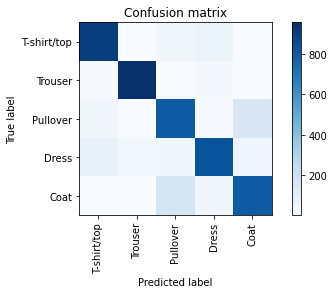

In [ ]:
svc_cm = metrics.confusion_matrix(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labels)
plt.show()

### rbg Kernal tuning

In [ ]:
svc_grid = SVC(random_state=42,probability=True)
svm_search = GridSearchCV(
    estimator=svc_grid, param_grid=tuned_parameters,
    scoring='accuracy', cv=4,refit=True,verbose=2)

In [ ]:
svm_search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] C=5, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=5, gamma=scale, kernel=rbf, total= 1.8min
[CV] C=5, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ..................... C=5, gamma=scale, kernel=rbf, total= 1.8min
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total= 1.8min
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total= 1.8min
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=11.3min
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=11.2min
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=11.1min
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=11.1min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 196.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5, 10, 25], 'gamma': ['scale', 0.1, 1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [ ]:
print(svm_search.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
results_df = pd.DataFrame(svm_search.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_scale_rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",1,0.906490,0.006465
5_scale_rbf,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",2,0.905190,0.003420
25_scale_rbf,"{'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}",3,0.904090,0.004910
25_1_rbf,"{'C': 25, 'gamma': 1, 'kernel': 'rbf'}",4,0.839084,0.004960
10_1_rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",5,0.816382,0.003530
5_1_rbf,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}",6,0.795179,0.005038
25_0.1_rbf,"{'C': 25, 'gamma': 0.1, 'kernel': 'rbf'}",7,0.772477,0.007187
10_0.1_rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",8,0.741174,0.002598
5_0.1_rbf,"{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}",9,0.652971,0.032335


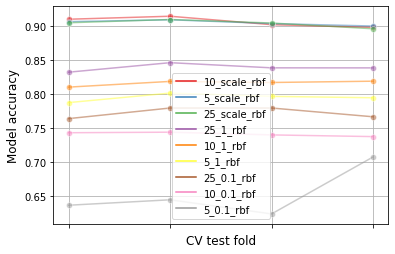

Correlation of models:
 kernel        10_scale_rbf  5_scale_rbf  ...  10_0.1_rbf  5_0.1_rbf
kernel                                   ...                       
10_scale_rbf      1.000000     0.984634  ...    0.984068  -0.549057
5_scale_rbf       0.984634     1.000000  ...    0.981623  -0.661963
25_scale_rbf      0.893165     0.957973  ...    0.912385  -0.805178
25_1_rbf          0.301391     0.346699  ...    0.169719   0.058297
10_1_rbf         -0.317327    -0.273409  ...   -0.445616   0.446934
5_1_rbf           0.160004     0.238162  ...    0.049355  -0.003360
25_0.1_rbf        0.235823     0.377926  ...    0.211808  -0.477983
10_0.1_rbf        0.984068     0.981623  ...    1.000000  -0.666130
5_0.1_rbf        -0.549057    -0.661963  ...   -0.666130   1.000000

[9 rows x 9 columns]


In [ ]:
# create df of model scores ordered by perfomance
model_scores = results_df.filter(regex=r'split\d*_test_score')

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model accuracy", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.grid()
plt.legend(loc="best")
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [ ]:
print("Best parameters set found on development set:")
print()
print(svm_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = svm_search.cv_results_['mean_test_score']
stds = svm_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, svm_search.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.905 (+/-0.007) for {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
0.653 (+/-0.065) for {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.795 (+/-0.010) for {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
0.906 (+/-0.013) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.741 (+/-0.005) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.816 (+/-0.007) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.904 (+/-0.010) for {'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}
0.772 (+/-0.014) for {'C': 25, 'gamma': 0.1, 'kernel': 'rbf'}
0.839 (+/-0.010) for {'C': 25, 'gamma': 1, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       999
           1       0.99      0.96      0.98      1000
           2 

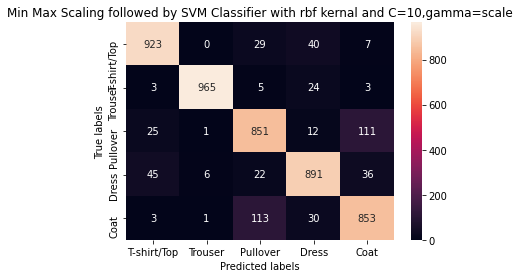

In [ ]:
svc_cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(svc_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title( 'Min Max Scaling followed by SVM Classifier with rbf kernal and C=10,gamma=scale' ); 
#ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat'])); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

In [ ]:
predictions_rbf = svm_search.predict(X_test)

In [ ]:
index = 0
misclassifiedIndexes_rbf = []
for label, predict in zip(y_test, predictions_rbf):
    if label[0] != predict: 
       misclassifiedIndexes_rbf.append(index)
    index +=1

In [ ]:
index = 0
corr_classifiedIndexes_rbf = []
for label, predict in zip(y_test, predictions_rbf):
    if label[0] == predict: 
       corr_classifiedIndexes_rbf.append(index)
    index +=1

In [ ]:
misclassifiedIndexes_rbf

[46,
 59,
 104,
 107,
 113,
 120,
 141,
 152,
 159,
 191,
 225,
 264,
 271,
 289,
 294,
 312,
 317,
 318,
 338,
 346,
 349,
 351,
 356,
 366,
 393,
 399,
 401,
 409,
 420,
 424,
 461,
 473,
 537,
 543,
 544,
 576,
 598,
 602,
 618,
 620,
 626,
 634,
 648,
 655,
 681,
 695,
 711,
 716,
 724,
 729,
 764,
 767,
 774,
 781,
 783,
 789,
 806,
 818,
 837,
 852,
 861,
 862,
 875,
 884,
 891,
 892,
 902,
 916,
 920,
 922,
 958,
 967,
 970,
 971,
 979,
 985,
 1024,
 1068,
 1069,
 1079,
 1111,
 1146,
 1164,
 1196,
 1239,
 1249,
 1302,
 1392,
 1457,
 1507,
 1522,
 1532,
 1539,
 1547,
 1590,
 1613,
 1648,
 1735,
 1760,
 1780,
 1786,
 1858,
 1860,
 1899,
 1903,
 1930,
 1934,
 1943,
 1956,
 1959,
 1987,
 2007,
 2029,
 2035,
 2041,
 2049,
 2059,
 2080,
 2084,
 2089,
 2091,
 2099,
 2102,
 2107,
 2119,
 2125,
 2136,
 2141,
 2145,
 2156,
 2158,
 2164,
 2165,
 2168,
 2177,
 2180,
 2181,
 2188,
 2208,
 2213,
 2215,
 2242,
 2243,
 2244,
 2249,
 2257,
 2262,
 2278,
 2293,
 2297,
 2315,
 2318,
 2328,
 2331,


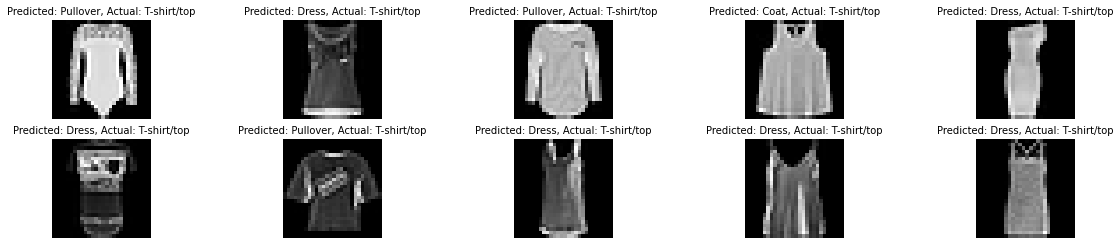

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes_rbf[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions_rbf[badIndex]))], labels[y_test[badIndex][0]]), fontsize = 10)

In [ ]:
corr_classifiedIndexes_rbf 


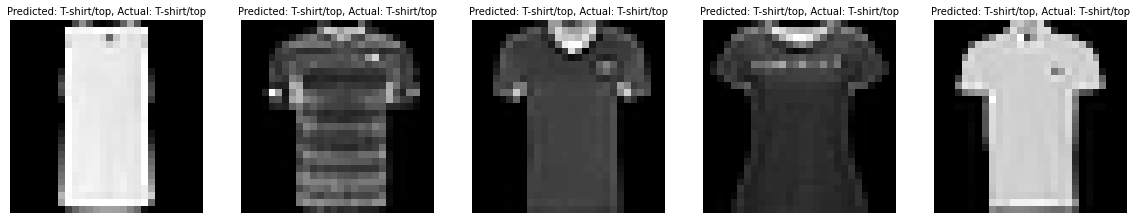

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(corr_classifiedIndexes_rbf[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[goodIndex], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions_rbf[goodIndex]))], labels[y_test[goodIndex][0]]), fontsize = 10)

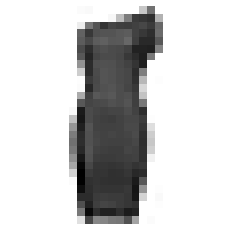

In [ ]:
showImage(X_test[ 113])

In [ ]:
y_test[113]

array([0])

In [ ]:
svm_search.predict_proba(X_test[113].reshape(1, -1))

array([[3.84042088e-04, 5.05265540e-03, 4.12496751e-05, 9.93080853e-01,
        1.44120023e-03]])

In [ ]:
svm_search.predict(X_test[113].reshape(1, -1))

array([3])